<a href="https://colab.research.google.com/github/kartiksharma2383/Machine-Learning/blob/main/Logistic_Regression_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np

In [49]:
raw_df = pd.read_csv('/content/weatherAUS(Machine Learning dataset 2).csv')
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [50]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [51]:
raw_df.dropna(subset = ['RainToday', 'RainTomorrow'], inplace = True)
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           140787 non-null  object 
 1   Location       140787 non-null  object 
 2   MinTemp        140319 non-null  float64
 3   MaxTemp        140480 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81093 non-null   float64
 6   Sunshine       73982 non-null   float64
 7   WindGustDir    131624 non-null  object 
 8   WindGustSpeed  131682 non-null  float64
 9   WindDir9am     131127 non-null  object 
 10  WindDir3pm     137117 non-null  object 
 11  WindSpeed9am   139732 non-null  float64
 12  WindSpeed3pm   138256 non-null  float64
 13  Humidity9am    139270 non-null  float64
 14  Humidity3pm    137286 non-null  float64
 15  Pressure9am    127044 non-null  float64
 16  Pressure3pm    127018 non-null  float64
 17  Cloud9am       88162 non-null   fl

In [52]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
px.histogram(raw_df, x = 'Location', title = 'Location vs Rainy Days', color = 'RainToday')

In [54]:
px.histogram(raw_df, x='RainTomorrow', color = 'RainToday', title = 'Rain Tomorrow vs Rain Today')

In [55]:
px.scatter(raw_df.sample(2000), title = 'MinTemp. vs MaxTemp.', x = 'MinTemp', y = 'MaxTemp', color = 'RainToday')

In [56]:
px.strip(raw_df.sample(2000), title = 'Temp (3 pm) vs. Humidity (3 pm)',
x = 'Temp3pm', y = 'Humidity3pm', color = 'RainTomorrow')

In [57]:
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(raw_df, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42)

In [58]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (84471, 23)
val_df.shape : (28158, 23)
test_df.shape : (28158, 23)


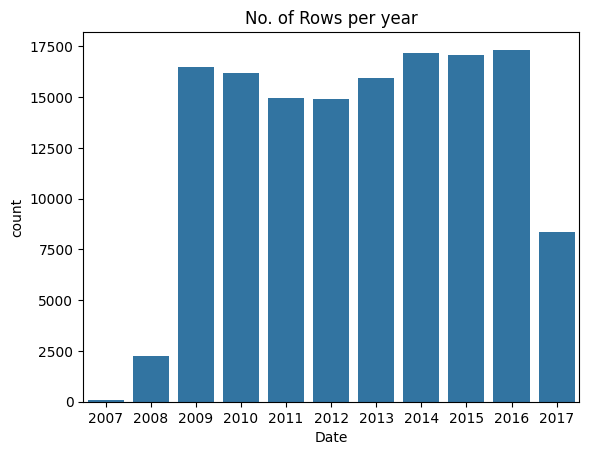

In [59]:
plt.title('No. of Rows per year')
sns.countplot(x = pd.to_datetime(raw_df.Date).dt.year);

In [128]:
year = pd.to_datetime(raw_df.Date).dt.year
train_df = raw_df[year < 2015].copy()
val_df = raw_df[year == 2015].copy()
test_df = raw_df[year > 2015].copy()

In [129]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (97988, 23)
val_df.shape : (17089, 23)
test_df.shape : (25710, 23)


In [62]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No


In [130]:
# Below code is separating your DataFrame into the features you will use to train your model and the target variable you want the model to predict and then further categorizing the input features into numerical and categorical types.
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'
numeric_cols = train_df[input_cols].select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_df[input_cols].select_dtypes('object').columns.tolist()

In [64]:
target_col

'RainTomorrow'

In [131]:
train_inputs = train_df[input_cols]
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [132]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97674.000000,97801.000000,97988.000000,61657.000000,57942.000000,91160.000000,97114.000000,96919.000000,96936.000000,96872.000000,88876.000000,88857.000000,63000.000000,61966.000000,97414.000000,97392.000000
mean,12.007831,23.022202,2.372935,5.289991,7.609004,40.215873,14.092263,18.764608,68.628745,51.469547,1017.513734,1015.132352,4.302952,4.410677,16.835126,21.540138
std,6.347175,6.984397,8.518819,3.952010,3.788813,13.697967,8.984203,8.872398,19.003097,20.756113,7.072510,6.997072,2.866634,2.693370,6.404586,6.831612
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,979.000000,0.000000,0.000000,-5.900000,-5.100000
25%,7.500000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.400000,1.000000,2.000000,12.200000,16.600000
50%,11.800000,22.400000,0.000000,4.600000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.600000,20.900000
75%,16.600000,27.900000,0.800000,7.200000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.400000,26.200000
max,33.900000,48.100000,371.000000,82.400000,14.300000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.100000


In [133]:
train_inputs[categorical_cols].nunique()

,0
Location,49
WindGustDir,16
WindDir9am,16
WindDir3pm,16
RainToday,2


In [134]:
# Imputing Missing Numeric Data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean')
raw_df[numeric_cols].isna().sum()

,0
MinTemp,468
MaxTemp,307
Rainfall,0
Evaporation,59694
Sunshine,66805
WindGustSpeed,9105
WindSpeed9am,1055
WindSpeed3pm,2531
Humidity9am,1517
Humidity3pm,3501


In [135]:
train_inputs[numeric_cols].isna().sum()

,0
MinTemp,314
MaxTemp,187
Rainfall,0
Evaporation,36331
Sunshine,40046
WindGustSpeed,6828
WindSpeed9am,874
WindSpeed3pm,1069
Humidity9am,1052
Humidity3pm,1116


In [136]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [137]:
list(imputer.statistics_)

[np.float64(12.18482386562048),
 np.float64(23.235120301822324),
 np.float64(2.349974074310839),
 np.float64(5.472515506887154),
 np.float64(7.630539861047281),
 np.float64(39.97051988882308),
 np.float64(13.990496092519967),
 np.float64(18.631140782316862),
 np.float64(68.82683277087672),
 np.float64(51.44928834695453),
 np.float64(1017.6545771543717),
 np.float64(1015.2579625879797),
 np.float64(4.431160817585808),
 np.float64(4.499250233195188),
 np.float64(16.98706638787991),
 np.float64(21.69318269001107)]

In [138]:
# Below line of code applies the imputer (which was previously fitted on the raw_df to calculate the mean of each numeric column) to the numeric columns of the train_inputs DataFrame. The transform method replaces the missing values (NaNs) in these columns with the calculated mean for each respective column.
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])

# Below line of code creates a new DataFrame val_inputs containing only the input columns from the val_df DataFrame.
val_inputs = val_df[input_cols]

# Below line of code applies the same fitted imputer to the numeric columns of the val_inputs DataFrame, filling any missing values with the means calculated from the original raw_df.
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])

# Below line of code applies the same fitted imputer to the numeric columns of the test_inputs DataFrame, filling missing values with the means calculated from the original raw_df.
test_inputs = test_df[input_cols]
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [139]:
train_inputs[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,5.472516,7.63054,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.49925,16.9,21.8
1,7.4,25.1,0.0,5.472516,7.63054,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.431161,4.49925,17.2,24.3
2,12.9,25.7,0.0,5.472516,7.63054,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.431161,2.00000,21.0,23.2
3,9.2,28.0,0.0,5.472516,7.63054,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.431161,4.49925,18.1,26.5
4,17.5,32.3,1.0,5.472516,7.63054,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,16.9,33.2,0.0,5.472516,7.63054,43.0,24.0,26.0,22.0,13.0,1014.1,1009.8,4.431161,4.49925,23.7,31.8
144549,15.1,36.8,0.0,5.472516,7.63054,31.0,19.0,20.0,16.0,8.0,1012.6,1007.6,4.431161,4.49925,28.9,34.8
144550,17.3,37.8,0.0,5.472516,7.63054,39.0,26.0,9.0,15.0,8.0,1011.9,1008.0,4.431161,4.49925,29.7,35.7
144551,20.1,38.5,0.0,5.472516,7.63054,43.0,28.0,17.0,22.0,9.0,1014.0,1009.2,4.431161,4.49925,29.8,37.2


In [140]:
train_inputs[numeric_cols].isna().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [141]:
# Scaling Numeric Features
raw_df[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
scaler = MinMaxScaler()
# Impute missing values first
train_numeric_imputed = imputer.transform(train_inputs[numeric_cols])
# Fit the scaler on the imputed training data
scaler.fit(train_numeric_imputed)

MinMaxScaler()

In [144]:
print('Minimum:')
list(scaler.data_min_)

Minimum:


[np.float64(-8.5),
 np.float64(-4.1),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(6.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(980.5),
 np.float64(979.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(-5.9),
 np.float64(-5.1)]

In [145]:
print('Maximum:')
list(scaler.data_max_)

Maximum:


[np.float64(33.9),
 np.float64(48.1),
 np.float64(371.0),
 np.float64(82.4),
 np.float64(14.3),
 np.float64(135.0),
 np.float64(87.0),
 np.float64(87.0),
 np.float64(100.0),
 np.float64(100.0),
 np.float64(1041.0),
 np.float64(1039.6),
 np.float64(9.0),
 np.float64(9.0),
 np.float64(40.2),
 np.float64(46.1)]

In [146]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [147]:
train_inputs[numeric_cols]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.516509,0.517241,0.001617,0.066414,0.533604,0.294574,0.229885,0.275862,0.71,0.22,0.449587,0.463696,0.888889,0.499917,0.494577,0.525391
1,0.375000,0.559387,0.000000,0.066414,0.533604,0.294574,0.045977,0.252874,0.44,0.25,0.497521,0.475248,0.492351,0.499917,0.501085,0.574219
2,0.504717,0.570881,0.000000,0.066414,0.533604,0.310078,0.218391,0.298851,0.38,0.30,0.447934,0.490099,0.492351,0.222222,0.583514,0.552734
3,0.417453,0.614943,0.000000,0.066414,0.533604,0.139535,0.126437,0.103448,0.45,0.16,0.613223,0.557756,0.492351,0.499917,0.520607,0.617188
4,0.613208,0.697318,0.002695,0.066414,0.533604,0.271318,0.080460,0.229885,0.82,0.33,0.500826,0.445545,0.777778,0.888889,0.514100,0.679688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144548,0.599057,0.714559,0.000000,0.066414,0.533604,0.286822,0.275862,0.298851,0.22,0.13,0.555372,0.508251,0.492351,0.499917,0.642082,0.720703
144549,0.556604,0.783525,0.000000,0.066414,0.533604,0.193798,0.218391,0.229885,0.16,0.08,0.530579,0.471947,0.492351,0.499917,0.754881,0.779297
144550,0.608491,0.802682,0.000000,0.066414,0.533604,0.255814,0.298851,0.103448,0.15,0.08,0.519008,0.478548,0.492351,0.499917,0.772234,0.796875
144551,0.674528,0.816092,0.000000,0.066414,0.533604,0.286822,0.321839,0.195402,0.22,0.09,0.553719,0.498350,0.492351,0.499917,0.774403,0.826172


In [148]:
train_inputs[numeric_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000,97988.000000
mean,0.483689,0.519590,0.006396,0.065020,0.532714,0.265107,0.161970,0.215668,0.686309,0.514693,0.612014,0.596437,0.483192,0.493693,0.493189,0.520333
std,0.149458,0.133673,0.022962,0.038060,0.203741,0.102420,0.102805,0.101424,0.189008,0.206376,0.111335,0.109954,0.255486,0.238028,0.138521,0.133024
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.377358,0.421456,0.000000,0.046117,0.524476,0.193798,0.080460,0.149425,0.570000,0.370000,0.543802,0.526403,0.333333,0.333333,0.392625,0.423828
50%,0.478774,0.507663,0.000000,0.066414,0.533604,0.255814,0.149425,0.218391,0.690000,0.520000,0.614125,0.598316,0.492351,0.499917,0.488069,0.509766
75%,0.591981,0.613027,0.002156,0.067961,0.643357,0.310078,0.218391,0.275862,0.830000,0.650000,0.682645,0.665017,0.666667,0.666667,0.590022,0.609375
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [149]:
# Encoding Categorical Data
raw_df[categorical_cols].nunique()

,0
Location,49
WindGustDir,16
WindDir9am,16
WindDir3pm,16
RainToday,2


In [150]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown = 'ignore', sparse_output=False)

In [151]:
raw_df2 = raw_df[categorical_cols].fillna('Unkonwn')

In [152]:
# Fit and transform on the trainig data
train_categorical_encoded = encoder.fit_transform(train_df[categorical_cols].astype(str).fillna('Unkonwn'))

# Transform on the validation and test data
val_categorical_encoded = encoder.transform(val_df[categorical_cols].astype(str).fillna('Unkonwn'))
test_categorical_encoded = encoder.transform(test_df[categorical_cols].astype(str).fillna('Unkonwn'))

In [153]:
encoder.fit(raw_df2)

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [154]:
raw_df[categorical_cols]

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
0,Albury,W,W,WNW,No
1,Albury,WNW,NNW,WSW,No
2,Albury,WSW,W,WSW,No
3,Albury,NE,SE,E,No
4,Albury,W,ENE,NW,No
...,...,...,...,...,...
145454,Uluru,E,ESE,E,No
145455,Uluru,E,SE,ENE,No
145456,Uluru,NNW,SE,N,No
145457,Uluru,N,SE,WNW,No


In [155]:
encoder.categories_

[array(['Adelaide', 'Albany', 'Albury', 'AliceSprings', 'BadgerysCreek',
        'Ballarat', 'Bendigo', 'Brisbane', 'Cairns', 'Canberra', 'Cobar',
        'CoffsHarbour', 'Dartmoor', 'Darwin', 'GoldCoast', 'Hobart',
        'Katherine', 'Launceston', 'Melbourne', 'MelbourneAirport',
        'Mildura', 'Moree', 'MountGambier', 'MountGinini', 'Newcastle',
        'Nhil', 'NorahHead', 'NorfolkIsland', 'Nuriootpa', 'PearceRAAF',
        'Penrith', 'Perth', 'PerthAirport', 'Portland', 'Richmond', 'Sale',
        'SalmonGums', 'Sydney', 'SydneyAirport', 'Townsville',
        'Tuggeranong', 'Uluru', 'WaggaWagga', 'Walpole', 'Watsonia',
        'Williamtown', 'Witchcliffe', 'Wollongong', 'Woomera'],
       dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unkonwn', 'W', 'WNW', 'WSW'], dtype=object),
 array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
        'SSW', 'SW', 'Unkonwn', 'W', 'WNW', 'WSW'], dtype=

In [156]:
# get_feature_names_out method takes the original categorical column names (categorical_cols) as input and returns an array containing the names of the new columns created after one-hot encoding.
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'Location_Sydney', 'Location_SydneyAirport', 'Location_Townsville', 'Location_Tuggeranong', 'Location_Uluru', 'Location_WaggaWagga', 'Location_Walpole', 'Location_Watsonia', 'Location_Williamtown', 'Loca

In [157]:
# .fillna('Unkonwn'): Fills any missing values (NaN) in these categorical columns with the string 'Unkonwn'. This is important because the OneHotEncoder needs to handle missing values, encoder.transform(...): Applies the fitted OneHotEncoder (from a previous step) to these filled categorical columns. This transforms the categorical values into a sparse matrix of one-hot encoded vectors. The same is done for val_df and test_df.
train_categorical_encoded = encoder.transform(train_df[categorical_cols].fillna('Unkonwn'))
val_categorical_encoded = encoder.transform(val_df[categorical_cols].fillna('Unkonwn'))
test_categorical_encoded = encoder.transform(test_df[categorical_cols].fillna('Unkonwn'))

# Apply imputer to numeric columns before combining
train_numeric_imputed = imputer.transform(train_df[numeric_cols])
val_numeric_imputed = imputer.transform(val_df[numeric_cols])
test_numeric_imputed = imputer.transform(test_df[numeric_cols])

# Apply scaler to the imputed numeric data
train_numeric_scaled = scaler.transform(train_numeric_imputed)
val_numeric_scaled = scaler.transform(val_numeric_imputed)
test_numeric_scaled = scaler.transform(test_numeric_imputed)

# pd.DataFrame(train_numeric_scaled, columns=numeric_cols).reset_index(drop=True): This takes the train_numeric_scaled NumPy array (which contains your scaled numerical features), converts it into a pandas DataFrame, assigns the original numeric_cols as the column names, and then resets the index of this DataFrame.
# pd.DataFrame(train_categorical_encoded, columns=encoded_cols).reset_index(drop=True): This takes the train_categorical_encoded NumPy array (which contains your one-hot encoded categorical features), converts it into a pandas DataFrame, assigns the encoded_cols (the names of the new columns created by one-hot encoding) as the column names, and then resets the index.
# pd.concat([...], axis=1): This function from the pandas library is used to concatenate (join) the two DataFrames created in the previous steps. axis=1 specifies that the concatenation should happen column-wise.
# train_inputs = ...: The resulting concatenated DataFrame, which now contains both the scaled numerical features and the one-hot encoded categorical features as columns, is assigned to the train_inputs variable.
train_inputs = pd.concat([pd.DataFrame(train_numeric_scaled, columns=numeric_cols).reset_index(drop=True), pd.DataFrame(train_categorical_encoded, columns=encoded_cols).reset_index(drop=True)], axis=1)
val_inputs = pd.concat([pd.DataFrame(val_numeric_scaled, columns=numeric_cols).reset_index(drop=True), pd.DataFrame(val_categorical_encoded, columns=encoded_cols).reset_index(drop=True)], axis=1)
test_inputs = pd.concat([pd.DataFrame(test_numeric_scaled, columns=numeric_cols).reset_index(drop=True), pd.DataFrame(test_categorical_encoded, columns=encoded_cols).reset_index(drop=True)], axis=1)

In [158]:
pd.set_option('display.max_columns', None)
test_inputs

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_Unkonwn,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_Unkonwn,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unkonwn,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.681604,0.798851,0.000000,0.066414,0.533604,0.372093,0.000000,0.080460,0.46,0.17,0.543802,0.498350,0.777778,0.333333,0.694143,0.816406,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.693396,0.722222,0.001078,0.066414,0.533604,0.341085,0.103448,0.195402,0.54,0.30,0.505785,0.485149,0.888889,0.888889,0.665944,0.718750,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.634434,0.521073,0.005930,0.066414,0.533604,0.325581,0.126437,0.448276,0.62,0.67,0.553719,0.590759,0.888889,0.888889,0.600868,0.480469,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.608491,0.532567,0.042049,0.066414,0.533604,0.255814,0.103448,0.195402,0.74,0.65,0.618182,0.618812,0.888889,0.888889,0.544469,0.521484,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [159]:
train_targets = train_df[target_col]
val_targets = val_df[target_col]
test_targets = test_df[target_col]
print('train_inputs:', train_inputs.shape)
print('train_targets:', train_targets.shape)
print('val_inputs:', val_inputs.shape)
print('val_targets:', val_targets.shape)
print('test_inputs:', test_inputs.shape)
print('test_targets:', test_targets.shape)

train_inputs: (97988, 118)
train_targets: (97988,)
val_inputs: (17089, 118)
val_targets: (17089,)
test_inputs: (25710, 118)
test_targets: (25710,)


In [160]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [161]:
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('val_targets.parquet')
pd.DataFrame(test_targets).to_parquet('test_targets.parquet')

In [162]:
# Training a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [163]:
model = LogisticRegression(solver = 'liblinear')

In [164]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [165]:
print(numeric_cols + encoded_cols)

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_

In [166]:
print(model.coef_.tolist())

[[0.8953845591416268, -2.8793497401551207, 3.1594617889552175, 0.6306829821526897, -1.6506520652693921, 6.767885898942711, -0.6528152978813196, -1.4224870433050274, 0.32335109438914206, 5.997994196332163, 5.518840773170353, -8.952957695792898, -0.1622809115300009, 1.2866452219009437, 0.46956865343662474, 2.002151819560512, 0.5975766226795766, -0.5569520858427786, 0.47295836338763686, 0.0025201555016598335, 0.3422871217397318, -0.3566826883104339, 0.1770112661042366, 0.43671434228852307, -0.017071895394388612, 0.02516739244391364, 0.2558943122887288, -0.02254411442958979, -0.043680867137769405, -0.4861385024724692, -0.13976497472129007, -0.5769339807656761, -0.7886032270569342, -0.262132192706957, -0.33055454256031247, -0.5705243241456059, 0.08025251783804681, 0.007184170731560374, 0.06409660178690152, -0.911327129638571, -0.4509702530588022, 0.0020844352891434947, -0.46549790575411976, -0.46658634981212616, -0.07183099009436374, 0.18853134248333803, 0.4464458914582927, 0.60478435486316

In [167]:
n = len(model.coef_.tolist())
weight_df = pd.DataFrame({
    'featurer': (numeric_cols + encoded_cols),
    'weight' : model.coef_.tolist()[0]
})

<Axes: xlabel='weight', ylabel='featurer'>

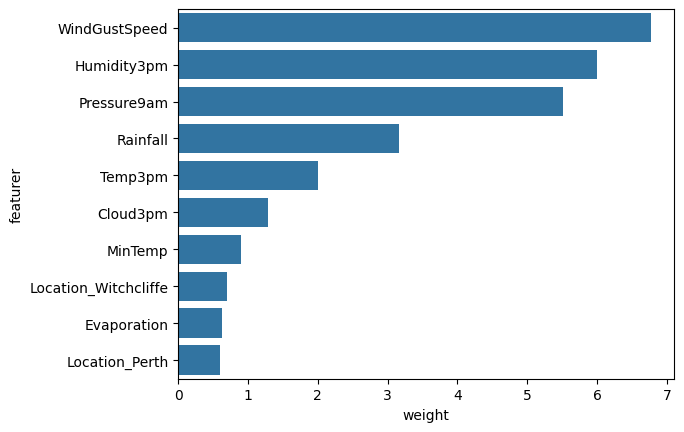

In [168]:
sns.barplot(data = weight_df.sort_values('weight', ascending = False).head(10), x = 'weight', y = 'featurer')

In [169]:
print(model.intercept_)

[-2.6215086]


In [170]:
# Making predictions and evaluating the model
x_train = train_inputs[numeric_cols + encoded_cols]
x_val = val_inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]

In [171]:
train_preds = model.predict(x_train)
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [172]:
train_targets

,RainTomorrow
0,No
1,No
2,No
3,No
4,No
...,...
144548,No
144549,No
144550,No
144551,No


In [173]:
train_probs = model.predict_proba(x_train)
train_probs

array([[0.94421914, 0.05578086],
       [0.94068185, 0.05931815],
       [0.96113838, 0.03886162],
       ...,
       [0.98755334, 0.01244666],
       [0.98340638, 0.01659362],
       [0.87507378, 0.12492622]])

In [174]:
from sklearn.metrics import accuracy_score
accuracy_score(train_targets, train_preds)

0.8519920806629383

In [175]:
from sklearn.metrics import confusion_matrix
confusion_matrix(train_targets, train_preds, normalize = 'true')

array([[0.94625279, 0.05374721],
       [0.477475  , 0.522525  ]])

In [176]:
def predict_and_plot(inputs, targets, name=''):
  preds = model.predict(inputs)
  accuracy = accuracy_score(targets, preds)
  print("Accuracy: {:.2f}%".format(accuracy * 100))
  cf = confusion_matrix(targets, preds, normalize = 'true')
  plt.figure()
  sns.heatmap(cf, annot = True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} Confusion Matrix'.format(name));
  return preds

Accuracy: 85.20%


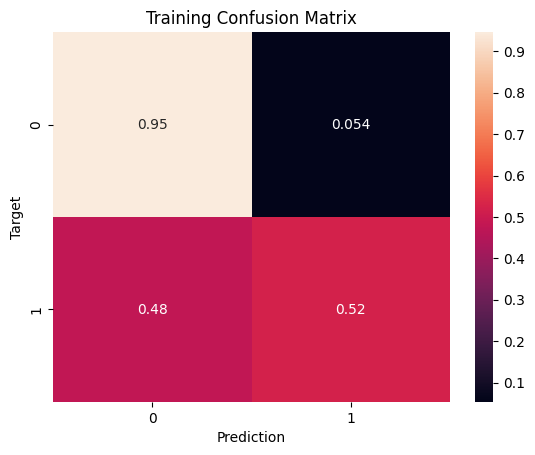

In [177]:
train_preds = predict_and_plot(x_train, train_targets, 'Training')

Accuracy: 85.41%


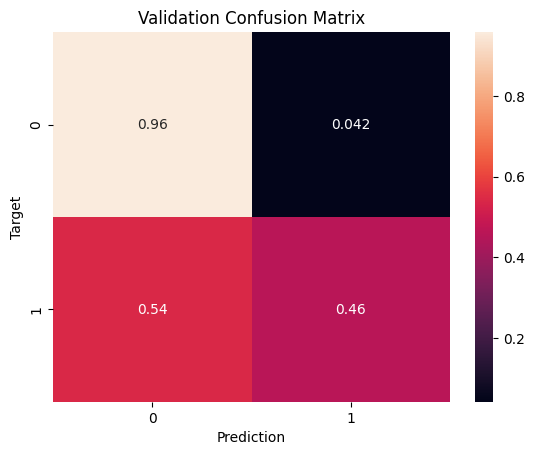

In [178]:
val_preds = predict_and_plot(x_val, val_targets, 'Validation')

Accuracy: 84.19%


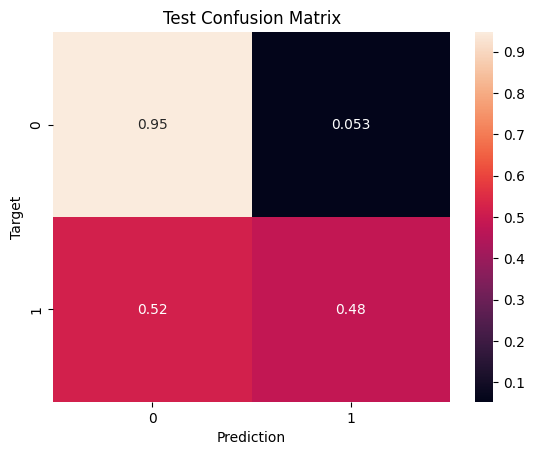

In [179]:
test_preds = predict_and_plot(x_test, test_targets, 'Test')

In [182]:
def random_guess(inputs):
  return np.random.choice(["No", "Yes"], len(inputs))

In [181]:
def all_no(inputs):
  return np.full(len(inputs), "No")

In [183]:
random_guess(x_val)

array(['Yes', 'Yes', 'No', ..., 'Yes', 'Yes', 'Yes'], dtype='<U3')

In [184]:
accuracy_score(test_targets, random_guess(x_test))

0.5007001166861144

In [185]:
accuracy_score(test_targets, all_no(x_test))

0.7734344612991054

In [186]:
# Predictions on Single Input
new_inputs = {'Date': '2021-06-19', 'Location': 'Katherine',
              'MinTemp': 23.2, 'MaxTemp': 33.2,
              'Rainfall': 10.2, 'Evaporation': 4.2,
              'Sunshine': np.nan, 'WindGustDir': 'NNW',
              'WindGustSpeed': 52.0, 'WindDir9am': 'NW',
              'WindDir3pm': 'NNE', 'WindSpeed9am': 13.0,
              'WindSpeed3pm': 20.0, 'Humidity9am': 89.0,
              'Humidity3pm': 58.0, 'Pressure9am': 1004.8,
              'Pressure3pm': 1001.5, 'Cloud9am': 8.0,
              'Cloud3pm': 5.0, 'Temp9am': 25.7,
              'Temp3pm': 33.0, 'RainToday': 'Yes'}

In [187]:
new_input_df = pd.DataFrame([new_inputs])
new_input_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2021-06-19,Katherine,23.2,33.2,10.2,4.2,NaN,NNW,52.0,NW,NNE,13.0,20.0,89.0,58.0,1004.8,1001.5,8.0,5.0,25.7,33.0,Yes


In [189]:
new_input_df[numeric_cols] = imputer.transform(new_input_df[numeric_cols])
new_input_df[numeric_cols] = scaler.transform(new_input_df[numeric_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])
new_input_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_Unkonwn,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_Unkonwn,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unkonwn,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,2021-06-19,Katherine,0.218105,0.092233,0.000074,0.000619,0.037315,NNW,-0.043747,NW,NNE,0.001718,0.002642,0.0089,0.0058,-16.199973,-16.148989,0.098765,0.061728,0.142852,0.114143,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [190]:
x_new_input = new_input_df[numeric_cols + encoded_cols]
x_new_input

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_Unkonwn,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_Unkonwn,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_Unkonwn,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,0.218105,0.092233,0.000074,0.000619,0.037315,-0.043747,0.001718,0.002642,0.0089,0.0058,-16.199973,-16.148989,0.098765,0.061728,0.142852,0.114143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [191]:
prediction = model.predict(x_new_input)[0]
prediction

'Yes'

In [192]:
prob = model.predict_proba(x_new_input)[0]
prob

array([0., 1.])

In [202]:
def predicted_input(single_input):
  input_df = pd.DataFrame([single_input])
  input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
  input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
  x_input = input_df[numeric_cols + encoded_cols]
  pred = model.predict(x_input)[0]
  prob = model.predict_proba(x_input)[0][list(model.classes_).index(pred)]
  return pred, prob

In [203]:
new_input = {'Date': '2021-06-19', 'Location': 'Launceston',
             'MinTemp': 23.2, 'MaxTemp': 33.2, 'Rainfall': 10.2,
             'Evaporation': 4.2, 'Sunshine': np.nan,
             'WindGustDir': 'NNW', 'WindGustSpeed': 52.0,
             'WindDir9am': 'NW', 'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0, 'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0, 'Humidity3pm': 20.0,
             'Pressure9am': 1004.8, 'Pressure3pm': 1001.5,
             'Cloud9am': 8.0, 'Cloud3pm': 5.0, 'Temp9am': 25.7,
             'Temp3pm': 33.0, 'RainToday': 'Yes'}

In [204]:
predicted_input(new_input)

('No', np.float64(0.8425367916098971))

In [205]:
# Below command returns an array of all the unique values in the Location column of the DataFrame raw_df.
raw_df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [207]:
# joblib library is useful for saving and loading Python objects that use NumPy arrays
import joblib

In [206]:
aussie_rain = {
    'model': model, 'imputer': imputer,
    'scaler': scaler, 'encoder': encoder,
    'numeric_cols': input_cols, 'categorical_cols': categorical_cols,
    'target_col': target_col, 'encoded_cols': encoded_cols
}

In [208]:
joblib.dump(aussie_rain, 'aussie_rain.joblib')

['aussie_rain.joblib']

In [209]:
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [210]:
test_preds2 = aussie_rain2['model'].predict(x_test)
accuracy_score(test_targets, test_preds2)

0.8418903150525088

In [230]:
# Data Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Load and clean data
raw_df = pd.read_csv('/content/weatherAUS(Machine Learning dataset 2).csv')
raw_df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

# Create training, validation, and test sets based on year
year = pd.to_datetime(raw_df.Date).dt.year
train_df = raw_df[year < 2015].copy()
val_df = raw_df[year == 2015].copy()
test_df = raw_df[year > 2015].copy()

# Define input and target columns
input_cols = list(train_df.columns)[1:-1]  # Exclude 'Date' and 'RainTomorrow'
target_col = 'RainTomorrow'

# Identify numeric and categorical columns
numeric_cols = raw_df[input_cols].select_dtypes(include=np.number).columns.tolist()
categorical_cols = raw_df[input_cols].select_dtypes(include='object').columns.tolist()

# Separate inputs and targets for each dataset
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

# Impute missing numeric values
imputer = SimpleImputer(strategy='mean')
imputer.fit(raw_df[numeric_cols])  # Fit on the entire dataset

train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

# Scale numeric features
scaler = MinMaxScaler()
scaler.fit(raw_df[numeric_cols])  # Fit on the entire dataset

train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

# One-hot encode categorical features
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoder.fit(raw_df[categorical_cols].astype(str).fillna('Unknown'))  # Fit on the full dataset

encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

train_categorical_encoded = encoder.transform(train_inputs[categorical_cols].astype(str).fillna('Unknown'))
val_categorical_encoded = encoder.transform(val_inputs[categorical_cols].astype(str).fillna('Unknown'))
test_categorical_encoded = encoder.transform(test_inputs[categorical_cols].astype(str).fillna('Unknown'))

# Combine numeric and encoded categorical columns
train_inputs = pd.concat([
    pd.DataFrame(train_inputs[numeric_cols], columns=numeric_cols).reset_index(drop=True),
    pd.DataFrame(train_categorical_encoded, columns=encoded_cols).reset_index(drop=True)
], axis=1)

val_inputs = pd.concat([
    pd.DataFrame(val_inputs[numeric_cols], columns=numeric_cols).reset_index(drop=True),
    pd.DataFrame(val_categorical_encoded, columns=encoded_cols).reset_index(drop=True)
], axis=1)

test_inputs = pd.concat([
    pd.DataFrame(test_inputs[numeric_cols], columns=numeric_cols).reset_index(drop=True),
    pd.DataFrame(test_categorical_encoded, columns=encoded_cols).reset_index(drop=True)
], axis=1)


Accuracy: 85.40%
Accuracy: 84.20%


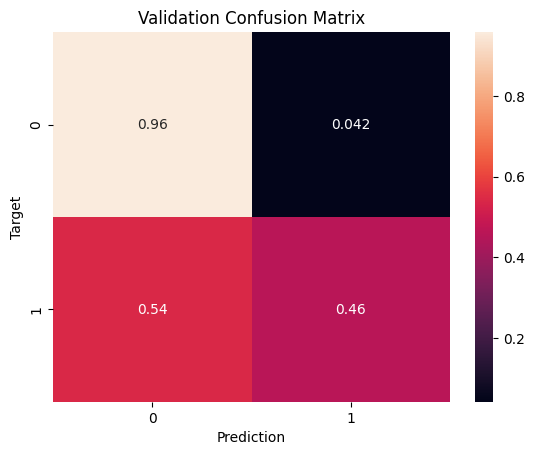

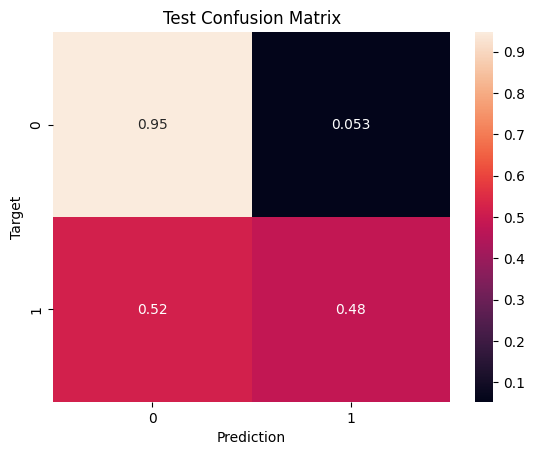

In [231]:
# Model Training and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select the columns to be used for training
x_train = train_inputs[numeric_cols + encoded_cols]
x_val = val_inputs[numeric_cols + encoded_cols]
x_test = test_inputs[numeric_cols + encoded_cols]

# Create and train the model
model = LogisticRegression(solver='liblinear')
model.fit(x_train, train_targets)

# Make predictions and probablities
train_preds = model.predict(x_train)
train_probs = model.predict_proba(x_train)
accuracy_score(train_targets, train_preds)

# Helper function to predict, compute accuracy and plot confusion matrix
def predict_and_plot(inputs, targets, name=''):
  preds = model.predict(inputs)
  accuracy = accuracy_score(targets, preds)
  print("Accuracy: {:.2f}%".format(accuracy * 100))
  cf = confusion_matrix(targets, preds, normalize='true')
  plt.figure()
  sns.heatmap(cf, annot=True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} Confusion Matrix'.format(name));
  return preds

# Evaluate on validation and test set
val_preds = predict_and_plot(x_val, val_targets, 'Validation')
test_preds = predict_and_plot(x_test, test_targets, 'Test')

aussie_rain = {
    'model': model, 'imputer': imputer,
    'scaler': scaler, 'encoder': encoder,
    'numeric_cols': numeric_cols, 'input_cols': input_cols,
    'target_col': target_col, 'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols
}
joblib.dump(aussie_rain, 'aussie_rain.joblib')
aussie_rain2 = joblib.load('aussie_rain.joblib')

In [236]:
# Prediciton on Single Inputs
def predict_input(single_input):
  input_df = pd.DataFrame([single_input])
  input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
  input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
  input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
  x_input = input_df[numeric_cols + encoded_cols]
  pred = model.predict(x_input)[0]
  prob = model.predict_proba(x_input)[0][list(model.classes_).index(pred)]
  return pred, prob

new_input = {'Date': '2021-06-19', 'Location': 'Launceston',
             'MinTemp': 23.2, 'MaxTemp': 33.2, 'Rainfall': 10.2,
             'Evaporation': 4.2, 'Sunshine': np.nan,
             'WindGustDir': 'NNW', 'WindGustSpeed': 52.0,
             'WindDir9am': 'NW', 'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0, 'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0, 'Humidity3pm': 20.0,
             'Pressure9am': 1004.8, 'Pressure3pm': 1001.5,
             'Cloud9am': 8.0, 'Cloud3pm': 5.0, 'Temp9am': 25.7,
             'Temp3pm': 33.0, 'RainToday': 'Yes'}

predict_input(new_input)

('No', np.float64(0.8416030201180493))